#### Build baseline model notebook for CP1 using Logistic Regression, with hyper-parameter tuning (regularization parameter), L1 and L2 regularization.  

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df_train = pd.read_csv('train_users_2.csv')
df_train['age'] = df_train['age'].apply(lambda x: np.nan if x > 120 else x)

In [32]:
len(df_train[df_train['age'].isnull()])

88771

In [6]:
df_train["age"].fillna(df_train["age"].mean(), inplace=True)

In [25]:
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,37.41187,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.00000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.00000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.00000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.00000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


### Find and replace country target categories into numbers

In [26]:
class_dict = {"country_destination": {
    'NDF': 0,
    'US': 1,
    'other': 2,
    'FR': 3,
    'CA': 4,
    'GB': 5,
    'ES': 6,
    'IT': 7,
    'PT': 8,
    'NL': 9,
    'DE': 10,
    'AU': 11
}
}

get.dummies() for features(gender, signup method+ flow...) categorical value
"https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html"
date created - date first booking = number 
x - feature
y - target
indices for dataframe col --search..
then apply accuray and classification report

In [27]:
df_train.replace(class_dict, inplace=True)
df_train.head(20)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,37.41187,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.00000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.00000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,1
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.00000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.00000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,1
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,37.41187,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,1
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.00000,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,1
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.00000,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,1
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.00000,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,1
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.00000,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,1


In [28]:
dummy_gender = pd.get_dummies(df_train['gender'], prefix='gender')
dummy_gender.head()

,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


In [29]:
df_train = pd.concat([df_train, dummy_gender], axis = 1)
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,37.41187,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,0,1,0,0,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.00000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,0,0,0,1,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.00000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,1,0,1,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.00000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2,0,1,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.00000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,1,1,0,0,0


In [30]:
dummy_signup = pd.get_dummies(df_train['signup_method'], prefix='signup_method')
dummy_signup.head()

,signup_method_basic,signup_method_facebook,signup_method_google
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [31]:
df_train = pd.concat([df_train, dummy_signup], axis = 1)
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_device_type,first_browser,country_destination,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,37.41187,facebook,0,en,direct,...,Mac Desktop,Chrome,0,1,0,0,0,0,1,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.00000,facebook,0,en,seo,...,Mac Desktop,Chrome,0,0,0,1,0,0,1,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.00000,basic,3,en,direct,...,Windows Desktop,IE,1,0,1,0,0,1,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.00000,facebook,0,en,direct,...,Mac Desktop,Firefox,2,0,1,0,0,0,1,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.00000,basic,0,en,direct,...,Mac Desktop,Chrome,1,1,0,0,0,1,0,0


In [32]:
dummy_lang = pd.get_dummies(df_train['language'], prefix='lang')
df_train = pd.concat([df_train, dummy_lang], axis = 1)
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,lang_ko,lang_nl,lang_no,lang_pl,lang_pt,lang_ru,lang_sv,lang_th,lang_tr,lang_zh
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,37.41187,facebook,0,en,direct,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.00000,facebook,0,en,seo,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.00000,basic,3,en,direct,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.00000,facebook,0,en,direct,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.00000,basic,0,en,direct,...,0,0,0,0,0,0,0,0,0,0


In [33]:
dummy_affiliate_provider = pd.get_dummies(df_train['affiliate_provider'], prefix='affiliate_provider')
df_train = pd.concat([df_train, dummy_affiliate_provider], axis = 1)
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,affiliate_provider_google,affiliate_provider_gsp,affiliate_provider_meetup,affiliate_provider_naver,affiliate_provider_other,affiliate_provider_padmapper,affiliate_provider_vast,affiliate_provider_wayn,affiliate_provider_yahoo,affiliate_provider_yandex
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,37.41187,facebook,0,en,direct,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.00000,facebook,0,en,seo,...,1,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.00000,basic,3,en,direct,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.00000,facebook,0,en,direct,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.00000,basic,0,en,direct,...,0,0,0,0,0,0,0,0,0,0


In [34]:
dummy_signup_app = pd.get_dummies(df_train['signup_app'], prefix='signup_app')
df_train = pd.concat([df_train, dummy_signup_app], axis = 1)
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,affiliate_provider_other,affiliate_provider_padmapper,affiliate_provider_vast,affiliate_provider_wayn,affiliate_provider_yahoo,affiliate_provider_yandex,signup_app_Android,signup_app_Moweb,signup_app_Web,signup_app_iOS
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,37.41187,facebook,0,en,direct,...,0,0,0,0,0,0,0,0,1,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.00000,facebook,0,en,seo,...,0,0,0,0,0,0,0,0,1,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.00000,basic,3,en,direct,...,0,0,0,0,0,0,0,0,1,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.00000,facebook,0,en,direct,...,0,0,0,0,0,0,0,0,1,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.00000,basic,0,en,direct,...,0,0,0,0,0,0,0,0,1,0


In [35]:
dummy_first_device_type = pd.get_dummies(df_train['first_device_type'], prefix='first_device_type')
df_train = pd.concat([df_train, dummy_first_device_type], axis = 1)
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,signup_app_iOS,first_device_type_Android Phone,first_device_type_Android Tablet,first_device_type_Desktop (Other),first_device_type_Mac Desktop,first_device_type_Other/Unknown,first_device_type_SmartPhone (Other),first_device_type_Windows Desktop,first_device_type_iPad,first_device_type_iPhone
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,37.41187,facebook,0,en,direct,...,0,0,0,0,1,0,0,0,0,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.00000,facebook,0,en,seo,...,0,0,0,0,1,0,0,0,0,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.00000,basic,3,en,direct,...,0,0,0,0,0,0,0,1,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.00000,facebook,0,en,direct,...,0,0,0,0,1,0,0,0,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.00000,basic,0,en,direct,...,0,0,0,0,1,0,0,0,0,0


In [36]:
dummy_first_browser = pd.get_dummies(df_train['first_browser'], prefix='first_browser')
df_train = pd.concat([df_train, dummy_first_browser], axis = 1)
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,37.41187,facebook,0,en,direct,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.00000,facebook,0,en,seo,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.00000,basic,3,en,direct,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.00000,facebook,0,en,direct,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.00000,basic,0,en,direct,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df_train.to_csv('df_baseline.csv')

In [42]:
# how many columns
df_train.shape[1]

131

In [43]:
# how many rows
df_train.shape[0]

213451

In [40]:
list(df_train)

['id',
 'date_account_created',
 'timestamp_first_active',
 'date_first_booking',
 'gender',
 'age',
 'signup_method',
 'signup_flow',
 'language',
 'affiliate_channel',
 'affiliate_provider',
 'first_affiliate_tracked',
 'signup_app',
 'first_device_type',
 'first_browser',
 'country_destination',
 'gender_-unknown-',
 'gender_FEMALE',
 'gender_MALE',
 'gender_OTHER',
 'signup_method_basic',
 'signup_method_facebook',
 'signup_method_google',
 'lang_ca',
 'lang_cs',
 'lang_da',
 'lang_de',
 'lang_el',
 'lang_en',
 'lang_es',
 'lang_fi',
 'lang_fr',
 'lang_hr',
 'lang_hu',
 'lang_id',
 'lang_is',
 'lang_it',
 'lang_ja',
 'lang_ko',
 'lang_nl',
 'lang_no',
 'lang_pl',
 'lang_pt',
 'lang_ru',
 'lang_sv',
 'lang_th',
 'lang_tr',
 'lang_zh',
 'affiliate_provider_baidu',
 'affiliate_provider_bing',
 'affiliate_provider_craigslist',
 'affiliate_provider_daum',
 'affiliate_provider_direct',
 'affiliate_provider_email-marketing',
 'affiliate_provider_facebook',
 'affiliate_provider_facebook-op

In [3]:
df = pd.read_csv('df_baseline.csv')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#define the first parameter and see what it is
# slice 16: 131
X = df.iloc[:, 16:131].values
print("X: ", type(X), X.shape)

X:  <class 'numpy.ndarray'> (213451, 115)


In [5]:
#df_train.drop(df.columns[:16],axis=1)
df.head()

,Unnamed: 0,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,...,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,37.41187,facebook,0,en,...,0,0,0,0,0,0,0,0,0,0
1,1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.00000,facebook,0,en,...,0,0,0,0,0,0,0,0,0,0
2,2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.00000,basic,3,en,...,0,0,0,0,0,0,0,0,0,0
3,3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.00000,facebook,0,en,...,0,0,0,0,0,0,0,0,0,0
4,4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.00000,basic,0,en,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# what is the shape of the dataframe used to build X?
df.iloc[:, 16:131].shape

(213451, 115)

In [7]:
# define the second parameter, investigate its type and shape
# and also compare its shape with that of the dataframe it comes from ...
#y = (df.country_destination == "country_destination").values

# notice that, by construction, y will have value True in positions where
# the value for the "Gender" column of the dataframe is "Male", and False
# otherwise
#print("y: ", type(y), y.shape)
#print("df.country_destination shape: ", df.Country_destination.shape)

y = df.iloc[:, 16].values
print("Y: ", type(y), y.shape)

Y:  <class 'numpy.ndarray'> (213451,)


In [8]:
# AJS: Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, random_state=5)

In [9]:
# AJS:
print("\n")
print("Xlr:", Xlr, type(Xlr), Xlr.shape, len(Xlr)) #TrainX

# AJS:
print("\n")
print("Xtestlr", Xtestlr, type(Xtestlr), Xtestlr.shape, len(Xtestlr)) #TestX

# AJS:
print("\n")
print("ylr", ylr, type(ylr), ylr.shape, len(ylr)) #Trainy

# AJS:
print("\n")
print("ytestlr", ytestlr, type(ytestlr), ytestlr.shape, len(ytestlr)) #Testy

# AJS:
# By default train_test_split splits to 75% train and 25% test
# Random state set to a fixed number wil guarantee 
# that the output of Run 1 will be equal to the output of Run 2, 
# i.e. your split will be always the same



Xlr: [[0 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]] <class 'numpy.ndarray'> (160088, 115) 160088


Xtestlr [[0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]] <class 'numpy.ndarray'> (53363, 115) 53363


ylr [0 1 0 ..., 0 0 0] <class 'numpy.ndarray'> (160088,) 160088


ytestlr [0 0 0 ..., 0 0 0] <class 'numpy.ndarray'> (53363,) 53363


### Splitting  data into training and testing
1. ```Xlr``` (the training set) is a matrix with 160088 rows and 2 columns--i.e., 75% of the dataset
2. ```ylr``` is the corresponding label vector for the training dataset
3. ```Xtestlr``` (the testing set) is a matrix with 53363 rows and 2 columns--i.e., 25% of the dataset
4. ```ytestlr``` is the corresponding label vector for the testing dataset

In [10]:
# construct the LogisticRegression model
clf = LogisticRegression()

# Fit the model on the training data.
clf.fit(Xlr, ylr) 

# Print the accuracy from the testing data.
# introduce variable to be reused later
y_predict_test = clf.predict(Xtestlr)
print("\n")
print("[Test] Accuracy score (y_predict_test, ytestlr):",accuracy_score(y_predict_test, ytestlr))

# Note the order in which the parameters must be passed
# according to the documentation ... although there should be
# no difference since it is a one-to-one comparison ...
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
print("\n")
print("[Test] Accuracy score: (ytestlr, y_predict_test)",accuracy_score(ytestlr, y_predict_test))

# also printout the training score
y_predict_training = clf.predict(Xlr)
print("\n")
print("[Training] Accuracy score: (ylr, y_predict_training)",accuracy_score(ylr, y_predict_training))



[Test] Accuracy score (y_predict_test, ytestlr): 0.876187620636


[Test] Accuracy score: (ytestlr, y_predict_test) 0.876187620636


[Training] Accuracy score: (ylr, y_predict_training) 0.877960871521


#### The model's training accuracy (0.877960871521) is okay, but there maybe bias in the model.

#### The model's test accuracy (0.876187620636) is pretty close to the training accuracy, then one says that there is no "variance" between the training accuracy and the test accuracy. This is an indication that the model will "generalize well".

In [12]:
df.iloc[:2,16]

0    0
1    0
Name: country_destination, dtype: int64

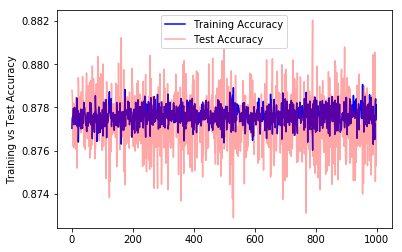

In [17]:
# AJS: we try multiple splits and see the effects, with the same proportion 75% train and 25% test

# keep lists for training accuracy, test accuracy, and the difference
# between the latter and the former
training_accuracy = []
test_accuracy = []
accuracy_difference = []

# define number of trials
n_splits = 1000

# define LogisticRegression object
clf = LogisticRegression()

# loop over multiple trials
for i in range(0, n_splits):
    # do split for this iteration, using shuffle and a different random_state 
    # for every iteration X = df.iloc[:, 16:131].values # y = df.iloc[:, 16].values



    Xlr, Xtestlr, ylr, ytestlr = train_test_split(df.iloc[:, 16:131].values, 
                                              (df.iloc[:, 16]).values,random_state=i)
    # fit on the training set
    clf.fit(Xlr, ylr)
    
    # predict on training set
    y_predict_training = clf.predict(Xlr)
    
    # predict on test set
    y_predict_test = clf.predict(Xtestlr)
    
    # save training accuracy for this split
    tr_accuracy = accuracy_score(y_predict_training, ylr)
    training_accuracy.append(tr_accuracy)
    
    # save test accuracy for this split
    tst_accuracy = accuracy_score(y_predict_test, ytestlr)
    test_accuracy.append(tst_accuracy)
    
    # save difference
    accuracy_difference.append(tst_accuracy - tr_accuracy)
#end for
#
# plot both curves
# ref: https://matplotlib.org/users/pyplot_tutorial.html
# parameter alpha below is a percentage of transparency
# ref: https://matplotlib.org/users/legend_guide.html
training_plot, = plt.plot(training_accuracy, 'b')
test_plot, = plt.plot(test_accuracy, 'r', alpha = 0.35)
plt.legend([training_plot, test_plot], ['Training Accuracy', 'Test Accuracy'])
plt.ylabel('Training vs Test Accuracy')
plt.show()

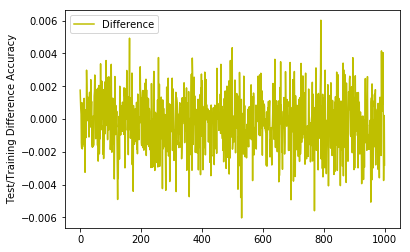

In [18]:
# show accuracy difference plot
diff_plot, = plt.plot(accuracy_difference, 'y')
plt.legend([diff_plot], ['Difference'])
plt.ylabel('Test/Training Difference Accuracy')
plt.show()

In [16]:
# use sklearn.metrics.classification_report for a more comprehensive
# performance analysis

from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report:]")
print(classification_report(ylr, y_predict_training))

print("[Test Classification Report:]")
print(classification_report(ytestlr, y_predict_test))

[Training Classification Report:]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93417
          1       0.72      1.00      0.84     46830
          2       0.30      0.00      0.00      7560
          3       0.00      0.00      0.00      3782
          4       0.00      0.00      0.00      1081
          5       0.00      0.00      0.00      1728
          6       0.42      0.00      0.01      1668
          7       0.07      0.03      0.05      2083
          8       0.00      0.00      0.00       154
          9       1.00      0.01      0.02       589
         10       0.51      0.15      0.24       804
         11       0.97      0.24      0.39       392

avg / total       0.82      0.88      0.83    160088

[Test Classification Report:]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     31126
          1       0.71      1.00      0.83     15546
          2       0.20      0.0

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### country_destination: 
    'NDF': 0,
    'US': 1,
    'other': 2,
    'FR': 3,
    'CA': 4,
    'GB': 5,
    'ES': 6,
    'IT': 7,
    'PT': 8,
    'NL': 9,
    'DE': 10,
    'AU': 11